In [33]:
import scipy
import numpy as np
import mpmath as mp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.covariance import MinCovDet
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

sns.set()

In [2]:
class Config:
    hurricane_data_path = '/home/vadbeg/Projects/University/STAT/stat_labs/data/hurricane.xlsx'
    long_data_path = '/home/vadbeg/Projects/University/STAT/stat_labs/data/long.xlsx'
    
config = Config()

In [3]:
def load_iris_dataset():
    data_iris = datasets.load_iris()

    target_names = data_iris['target_names']
    
    data_iris = pd.DataFrame(
        data=np.c_[
            data_iris['data'],
            data_iris['target'], 
        ],
        columns=data_iris['feature_names'] + ['target']
    )
    
    data_iris['target_names'] = data_iris['target'].apply(
        lambda x: target_names[int(x)]
    )
    
    return data_iris


def predict_class_mahalanobis(x, cluster_centers, cov_matrix):
    cluster_distances = list()
    
    for curr_claster_center in cluster_centers:
        
        mahalanobis_distance = scipy.spatial.distance.mahalanobis(
            u=x,
            v=curr_claster_center,
            VI=np.linalg.inv(cov_matrix)
        )

        cluster_distances.append(mahalanobis_distance)
        
    pred_class_idx = np.argmin(cluster_distances)
    
    return pred_class_idx


def get_all_predictions(X_all, cluster_centers, cov_matrix):
    all_predictions = list()

    for curr_x in X_all:
        pred_class = predict_class_mahalanobis(
            x=curr_x,
            cluster_centers=cluster_centers,
            cov_matrix=cov_matrix
        )
        
        all_predictions.append(pred_class)
        
    return all_predictions

## Data loading

In [4]:
data_iris = load_iris_dataset()

data_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [5]:
data_hurricane = pd.read_excel(config.hurricane_data_path)
data_hurricane.head()

,long,lat,class
0,59.0,17,BARO
1,80.0,10,TROP
2,59.5,21,BARO
3,60.0,12,TROP
4,60.5,16,BARO


In [6]:
data_long = pd.read_excel(config.long_data_path)
data_long.head()

,var1,var2,var3,var4,class
0,0.7143,0.4714,0.2000,0.0286,DANGER
1,0.9286,0.4000,0.6571,0.2143,OK
2,0.6571,0.4857,0.2000,0.0429,DANGER
3,0.8857,0.3143,0.6429,0.2143,OK
4,0.8429,0.4571,0.6857,0.2571,OK


## EDA

### Hurricane

<AxesSubplot:title={'center':'Longitude'}>

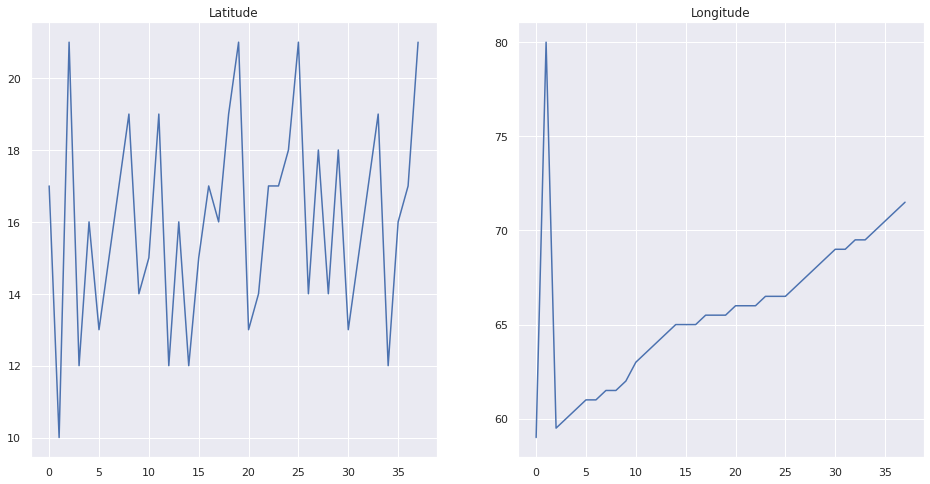

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs = axs.flatten()

axs[0].set_title('Latitude')
data_hurricane['lat'].plot(ax=axs[0])

axs[1].set_title('Longitude')
data_hurricane['long'].plot(ax=axs[1])

<AxesSubplot:xlabel='long', ylabel='lat'>

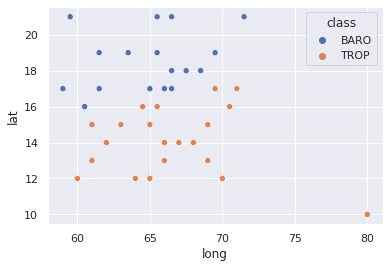

In [8]:
sns.scatterplot(data=data_hurricane, x='long', y='lat', hue='class')

<AxesSubplot:title={'center':'Number of items in class'}, xlabel='class', ylabel='count'>

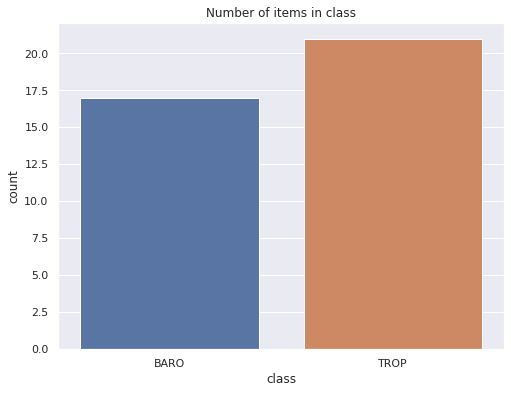

In [9]:
plt.subplots(figsize=(8, 6))
plt.title(f'Number of items in class')

sns.countplot(x=data_hurricane['class'])

### Long

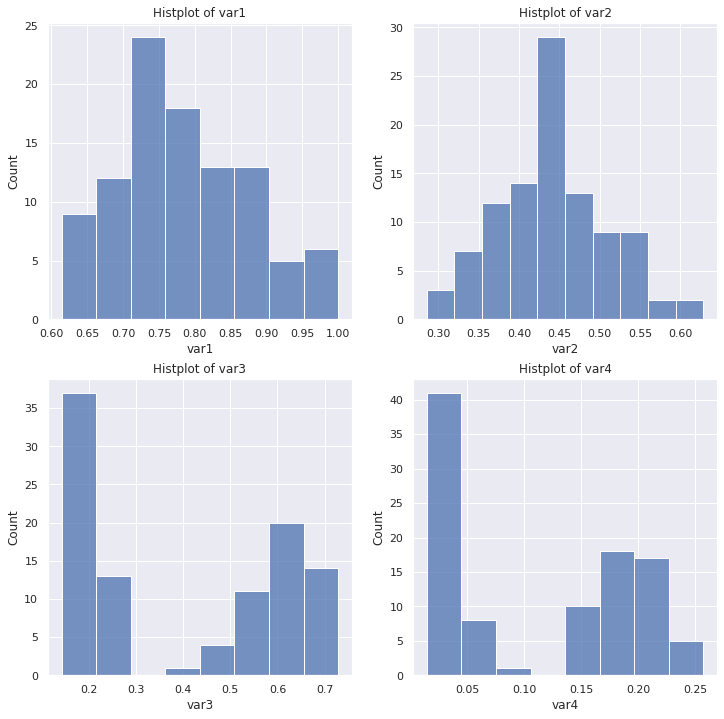

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()

for idx, curr_ax in enumerate(axs, start=0):
    curr_ax.set_title(f'Histplot of var{idx + 1}')
    
    sns.histplot(
        data_long[f'var{idx + 1}'],
        ax=curr_ax
    )

<AxesSubplot:title={'center':'Number of items in class'}, xlabel='class', ylabel='count'>

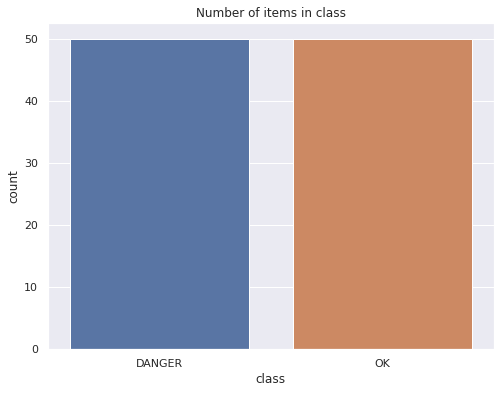

In [11]:
plt.subplots(figsize=(8, 6))
plt.title(f'Number of items in class')

sns.countplot(x=data_long['class'])

## Model

Let's build LinearDiscriminant model for each dataset 

### Iris model

#### No data split

In [55]:
data_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [56]:
data_iris['target'].unique()

array([0., 1., 2.])

In [57]:
data_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target_names'],
      dtype='object')

In [58]:
X = data_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = data_iris['target']

clf = LinearDiscriminantAnalysis(solver='svd', store_covariance=True)
clf.fit(X, y)

LinearDiscriminantAnalysis(store_covariance=True)

<AxesSubplot:title={'center':'Iris correlation matrix'}>

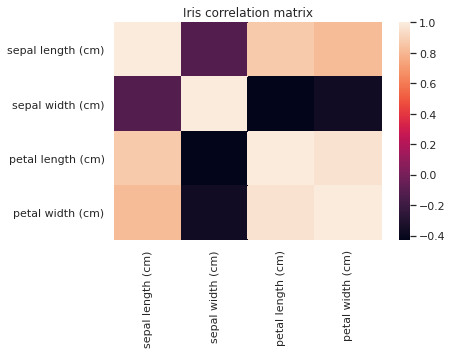

In [59]:
plt.title(f'Iris correlation matrix')

sns.heatmap(X.corr())

In [60]:
print(f'Stats NO DATA SPLIT')
print(f'Model accuracy on test data: {clf.score(X, y)}\n')
print(f'Weight vector: \n{clf.coef_}\n')
print(f'Intercept term: \n{clf.intercept_}\n')
print(f'Weighted within-class covariance matrix: \n{clf.covariance_}\n')
print(f'Class-wise means: \n{clf.means_}\n')
print(f'Percentage of variance explained by each of the selected components: \n{clf.explained_variance_ratio_}\n')

Stats NO DATA SPLIT
Model accuracy on test data: 0.98

Weight vector: 
[[  6.31475846  12.13931718 -16.94642465 -20.77005459]
 [ -1.53119919  -4.37604348   4.69566531   3.06258539]
 [ -4.78355927  -7.7632737   12.25075935  17.7074692 ]]

Intercept term: 
[-15.47783673  -2.02197415 -33.53768674]

Weighted within-class covariance matrix: 
[[0.259708   0.09086667 0.164164   0.03763333]
 [0.09086667 0.11308    0.05413867 0.032056  ]
 [0.164164   0.05413867 0.181484   0.041812  ]
 [0.03763333 0.032056   0.041812   0.041044  ]]

Class-wise means: 
[[5.006 3.428 1.462 0.246]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]

Percentage of variance explained by each of the selected components: 
[0.9912126 0.0087874]



#### With data split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

clf = LinearDiscriminantAnalysis(solver='svd', store_covariance=True)
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [62]:
print(f'Stats WITH DATA SPLIT')
print(f'Model accuracy on train data: {clf.score(X_train, y_train)}')
print(f'Model accuracy on test data: {clf.score(X_test, y_test)}\n')
print(f'Weight vector: \n{clf.coef_}\n')
print(f'Intercept term: \n{clf.intercept_}\n')
print(f'Weighted within-class covariance matrix: \n{clf.covariance_}\n')
print(f'Class-wise means: \n{clf.means_}\n')
print(f'Percentage of variance explained by each of the selected components: \n{clf.explained_variance_ratio_}\n')

Stats WITH DATA SPLIT
Model accuracy on train data: 0.98
Model accuracy on test data: 0.98

Weight vector: 
[[  4.2907456   12.96865639 -15.13271874 -22.09423819]
 [ -0.44283838  -5.3575508    4.02958273   3.21443097]
 [ -3.97792981  -8.00409518  11.56170324  19.54932959]]

Intercept term: 
[-11.110933    -3.13243671 -37.90202004]

Weighted within-class covariance matrix: 
[[0.2602303  0.0972     0.16550909 0.03299697]
 [0.0972     0.11589768 0.05819216 0.02989501]
 [0.16550909 0.05819216 0.18189234 0.04163066]
 [0.03299697 0.02989501 0.04163066 0.03723494]]

Class-wise means: 
[[5.         3.46470588 1.48823529 0.24705882]
 [6.02424242 2.73030303 4.26060606 1.31515152]
 [6.65151515 3.01515152 5.61212121 2.06363636]]

Percentage of variance explained by each of the selected components: 
[0.98638132 0.01361868]



#### Mahalanobis distance

In [63]:
all_predictions = get_all_predictions(
    X_all=X.values,
    cluster_centers=clf.means_,
    cov_matrix=MinCovDet().fit(X).covariance_
)

accuracy_mahalanobis = np.mean(np.int8(y) == all_predictions)
print(f'Mahalanobis algorithm accuracy: {accuracy_mahalanobis}')

Mahalanobis algorithm accuracy: 0.86


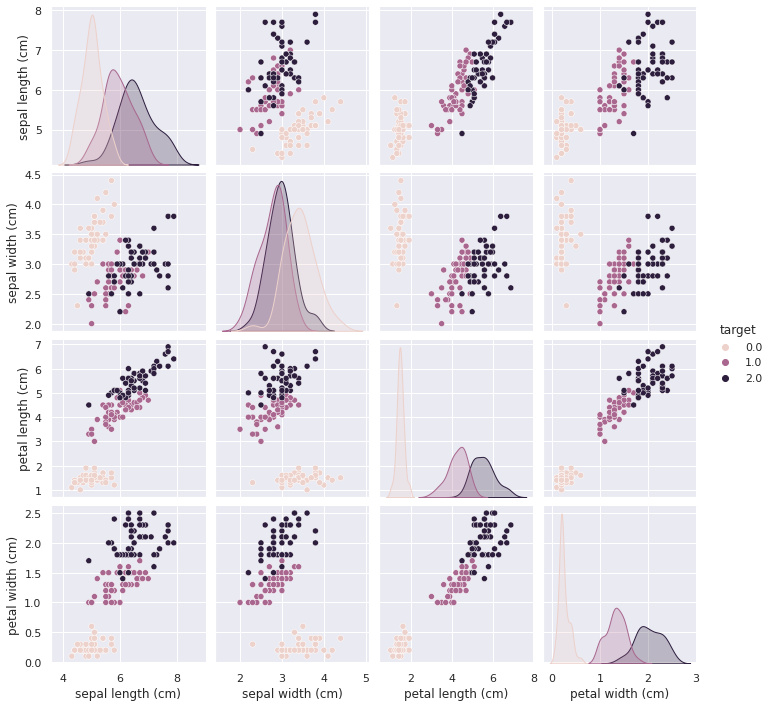

In [70]:
sns.pairplot(data=data_iris, hue='target')

#### Mahalanobis corr plot

In [68]:
def calculate_mahalanobis_corr(x1, x2, cov):
    print(x2)
    
    res = scipy.spatial.distance.mahalanobis(
            u=x1,
            v=x2,
            VI=np.linalg.inv(MinCovDet().fit(X).covariance_)
    )
    
    return res

X.corr(method=lambda x1, x2: calculate_mahalanobis(x1=x1, x2=x2, cov=MinCovDet().fit(X).covariance_))

[3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
 3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
 3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3 3.2 3.2 3.1 2.3
 2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7 2.2 2.5 3.2 2.8
 2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4 3.1 2.3 3.  2.5
 2.6 3.  2.6 2.3 2.7 3.  2.9 2.9 2.5 2.8 3.3 2.7 3.  2.9 3.  3.  2.5 2.9
 2.5 3.6 3.2 2.7 3.  2.5 2.8 3.2 3.  3.8 2.6 2.2 3.2 2.8 2.8 2.7 3.3 3.2
 2.8 3.  2.8 3.  2.8 3.8 2.8 2.8 2.6 3.  3.4 3.1 3.  3.1 3.1 3.1 2.7 3.2
 3.3 3.  2.5 3.  3.4 3. ]


ValueError: shapes (150,) and (4,4) not aligned: 150 (dim 0) != 4 (dim 0)

### Hurricane model

#### No data split

In [25]:
data_hurricane.head()

,long,lat,class
0,59.0,17,BARO
1,80.0,10,TROP
2,59.5,21,BARO
3,60.0,12,TROP
4,60.5,16,BARO


In [35]:
data_hurricane['target'] = LabelEncoder().fit_transform(data_hurricane['class'])

In [36]:
data_hurricane['target'].unique()

array([0, 1])

In [38]:
X = data_hurricane[['long', 'lat']]
y = data_hurricane['target']

clf = LinearDiscriminantAnalysis(solver='svd', store_covariance=True)
clf.fit(X, y)

LinearDiscriminantAnalysis(store_covariance=True)

<AxesSubplot:title={'center':'Hurrican correlation matrix'}>

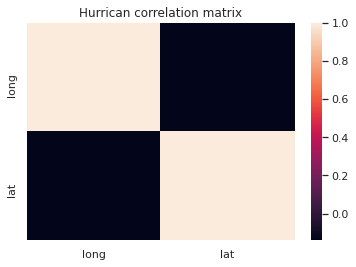

In [39]:
plt.title(f'Hurrican correlation matrix')

sns.heatmap(X.corr())

In [40]:
print(f'Stats NO DATA SPLIT')
print(f'Model accuracy on test data: {clf.score(X, y)}\n')
print(f'Weight vector: \n{clf.coef_}\n')
print(f'Intercept term: \n{clf.intercept_}\n')
print(f'Weighted within-class covariance matrix: \n{clf.covariance_}\n')
print(f'Class-wise means: \n{clf.means_}\n')
print(f'Percentage of variance explained by each of the selected components: \n{clf.explained_variance_ratio_}\n')

Stats NO DATA SPLIT
Model accuracy on test data: 0.9210526315789473

Weight vector: 
[[ 0.10654435 -1.43064277]]

Intercept term: 
[16.51092983]

Weighted within-class covariance matrix: 
[[16.01787557  0.14488427]
 [ 0.14488427  2.97862303]]

Class-wise means: 
[[64.94117647 18.52941176]
 [66.52380952 14.04761905]]

Percentage of variance explained by each of the selected components: 
[1.]



#### With data split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

clf = LinearDiscriminantAnalysis(solver='svd', store_covariance=True)
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [42]:
print(f'Stats WITH DATA SPLIT')
print(f'Model accuracy on train data: {clf.score(X_train, y_train)}')
print(f'Model accuracy on test data: {clf.score(X_test, y_test)}\n')
print(f'Weight vector: \n{clf.coef_}\n')
print(f'Intercept term: \n{clf.intercept_}\n')
print(f'Weighted within-class covariance matrix: \n{clf.covariance_}\n')
print(f'Class-wise means: \n{clf.means_}\n')
print(f'Percentage of variance explained by each of the selected components: \n{clf.explained_variance_ratio_}\n')

Stats WITH DATA SPLIT
Model accuracy on train data: 0.92
Model accuracy on test data: 0.9230769230769231

Weight vector: 
[[-0.01484223 -1.39541615]]

Intercept term: 
[24.03736093]

Weighted within-class covariance matrix: 
[[18.74227273 -0.87363636]
 [-0.87363636  3.01896104]]

Class-wise means: 
[[65.22727273 18.63636364]
 [66.25       14.07142857]]

Percentage of variance explained by each of the selected components: 
[1.]



#### Mahalanobis distance

In [43]:
all_predictions = get_all_predictions(
    X_all=X.values,
    cluster_centers=clf.means_,
    cov_matrix=MinCovDet().fit(X).covariance_
)

accuracy_mahalanobis = np.mean(np.int8(y) == all_predictions)
print(f'Mahalanobis algorithm accuracy: {accuracy_mahalanobis}')

Mahalanobis algorithm accuracy: 1.0


### Data long

#### No data split

In [44]:
data_long.head()

,var1,var2,var3,var4,class
0,0.7143,0.4714,0.2000,0.0286,DANGER
1,0.9286,0.4000,0.6571,0.2143,OK
2,0.6571,0.4857,0.2000,0.0429,DANGER
3,0.8857,0.3143,0.6429,0.2143,OK
4,0.8429,0.4571,0.6857,0.2571,OK


In [45]:
data_long['target'] = LabelEncoder().fit_transform(data_long['class'])

In [46]:
X = data_long[['var1', 'var2', 'var3', 'var4']]
y = data_long['target']

clf = LinearDiscriminantAnalysis(solver='svd', store_covariance=True)
clf.fit(X, y)

LinearDiscriminantAnalysis(store_covariance=True)

<AxesSubplot:title={'center':'Long correlation matrix'}>

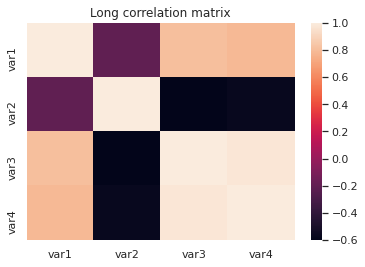

In [47]:
plt.title(f'Long correlation matrix')

sns.heatmap(X.corr())

In [49]:
print(f'Stats')
print(f'Model accuracy on test data: {clf.score(X, y)}\n')
print(f'Weight vector: \n{clf.coef_}\n')
print(f'Intercept term: \n{clf.intercept_}\n')
print(f'Weighted within-class covariance matrix: \n{clf.covariance_}\n')
print(f'Class-wise means: \n{clf.means_}\n')
print(f'Percentage of variance explained by each of the selected components: \n{clf.explained_variance_ratio_}\n')

Stats
Model accuracy on test data: 1.0

Weight vector: 
[[ -21.32206765 -126.16401779  152.29687861  215.93081562]]

Intercept term: 
[-13.97446159]

Weighted within-class covariance matrix: 
[[0.00390644 0.00184401 0.00199235 0.00066089]
 [0.00184401 0.00242144 0.0009437  0.00050467]
 [0.00199235 0.0009437  0.00251016 0.00079175]
 [0.00066089 0.00050467 0.00079175 0.00050186]]

Class-wise means: 
[[0.715146 0.489718 0.208864 0.03516 ]
 [0.847998 0.395718 0.60857  0.18943 ]]

Percentage of variance explained by each of the selected components: 
[1.]



#### With data split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

clf = LinearDiscriminantAnalysis(solver='svd', store_covariance=True)
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [51]:
print(f'Stats WITH DATA SPLIT')
print(f'Model accuracy on train data: {clf.score(X_train, y_train)}')
print(f'Model accuracy on test data: {clf.score(X_test, y_test)}\n')
print(f'Weight vector: \n{clf.coef_}\n')
print(f'Intercept term: \n{clf.intercept_}\n')
print(f'Weighted within-class covariance matrix: \n{clf.covariance_}\n')
print(f'Class-wise means: \n{clf.means_}\n')
print(f'Percentage of variance explained by each of the selected components: \n{clf.explained_variance_ratio_}\n')

Stats WITH DATA SPLIT
Model accuracy on train data: 1.0
Model accuracy on test data: 1.0

Weight vector: 
[[ -22.966664   -130.88353721  158.05099321  164.04990301]]

Intercept term: 
[-6.99956715]

Weighted within-class covariance matrix: 
[[0.00406466 0.00177554 0.00218233 0.00062301]
 [0.00177554 0.00224226 0.00105281 0.00048368]
 [0.00218233 0.00105281 0.00269458 0.00086314]
 [0.00062301 0.00048368 0.00086314 0.00052196]]

Class-wise means: 
[[0.71732424 0.48745152 0.21169697 0.03767879]
 [0.84244118 0.39622059 0.60293824 0.18655588]]

Percentage of variance explained by each of the selected components: 
[1.]



#### Mahalanobis distance

In [52]:
all_predictions = get_all_predictions(
    X_all=X.values,
    cluster_centers=clf.means_,
    cov_matrix=MinCovDet().fit(X).covariance_
)

accuracy_mahalanobis = np.mean(np.int8(y) == all_predictions)
print(f'Mahalanobis algorithm accuracy: {accuracy_mahalanobis}')

Mahalanobis algorithm accuracy: 0.99
